#                                             Mid-Term Project_Group-9
-----------------------------------------

In [1]:
#importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

pd.options.display.max_columns =None
pd.options.display.max_rows =10

In [2]:
#loading the data
df  = pd.read_csv("C://Users//KUMAARAVEL//Downloads//clickstream+data+for+online+shopping/e-shop clothing 2008.csv", delimiter=";")

#  Data Description

In [3]:
df.head()

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1


In [4]:
df = df.rename(columns={'page 1 (main category)':'page_1', 'page 2 (clothing model)':'page_2', 'model photography':'model_photography', 'price 2':'price_2'})

In [5]:
df.nunique()

year                   1
month                  5
day                   31
order                195
country               47
                    ... 
location               6
model_photography      2
price                 20
price_2                2
page                   5
Length: 14, dtype: int64

In [6]:
# we are removing year because it has only unique value 
df = df.drop(columns = 'year')

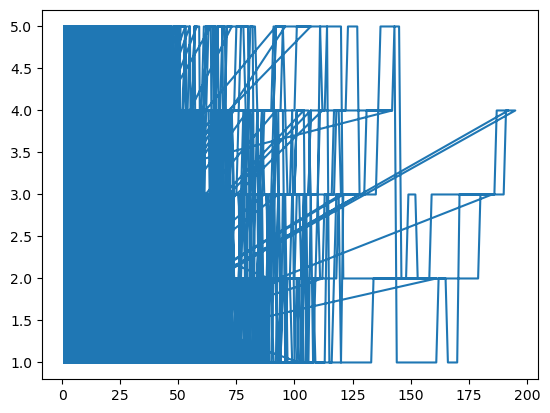

In [7]:
plt.plot(df.order, df.page)
plt.show()

In [8]:
# Size of the dataset
df.shape

(165474, 13)

In [9]:
#Examining the column names and the datatypes
df.dtypes

month                int64
day                  int64
order                int64
country              int64
session ID           int64
                     ...  
location             int64
model_photography    int64
price                int64
price_2              int64
page                 int64
Length: 13, dtype: object

In [10]:
#Finding number of unique values in each column
df.nunique()

month                    5
day                     31
order                  195
country                 47
session ID           24026
                     ...  
location                 6
model_photography        2
price                   20
price_2                  2
page                     5
Length: 13, dtype: int64

In [11]:
# List all columns
df.columns

Index(['month', 'day', 'order', 'country', 'session ID', 'page_1', 'page_2',
       'colour', 'location', 'model_photography', 'price', 'price_2', 'page'],
      dtype='object')

In [12]:
#Statistical understanding about the numerical data
df.describe()

,month,day,order,country,session ID,page_1,colour,location,model_photography,price,price_2,page
count,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000
mean,5.585887,14.524554,9.817476,26.952621,12058.417056,2.400842,6.227655,3.258198,1.260071,43.802507,1.488167,1.710166
std,1.328160,8.830374,13.478411,7.150691,7008.418903,1.144420,4.235606,1.713206,0.438674,12.548131,0.499861,0.982412
min,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000
25%,4.000000,7.000000,2.000000,29.000000,5931.000000,1.000000,3.000000,2.000000,1.000000,33.000000,1.000000,1.000000
50%,5.000000,14.000000,6.000000,29.000000,11967.500000,2.000000,4.000000,3.000000,1.000000,43.000000,1.000000,1.000000
75%,7.000000,22.000000,12.000000,29.000000,18219.000000,3.000000,9.000000,5.000000,2.000000,52.000000,2.000000,2.000000
max,8.000000,31.000000,195.000000,47.000000,24026.000000,4.000000,14.000000,6.000000,2.000000,82.000000,2.000000,5.000000


# Data Pre-Processing

In [13]:
# DATA PRE-PROCESSING

#Finding out missing values in each column
print (df.isna().sum())
#print df.isnull().sum()

month                0
day                  0
order                0
country              0
session ID           0
                    ..
location             0
model_photography    0
price                0
price_2              0
page                 0
Length: 13, dtype: int64


In [14]:
# Data is having no missing values

In [15]:
#FInding rows that have duplicate values
df[df.duplicated(keep = 'last')]  #This shows rows that show up more than once and have the exact same column values. 

# This shows all instances where pantient_id shows up more than once, but may have varying column values
#df[df.duplicated(subset = 'patient_id', keep =False)].sort_values('patient_id')

,month,day,order,country,session ID,page_1,page_2,colour,location,model_photography,price,price_2,page


In [16]:
#Data is having no Duplicate Values

In [56]:
df2= df.drop(columns = 'page_2')
corr = df2.corr(method = 'pearson')
corr

,month,day,order,country,session ID,page_1,colour,location,model_photography,price,price_2,page
month,1.000000,-0.075098,0.002008,0.065502,0.970961,0.017557,-0.035279,-0.017712,0.011102,0.012700,-0.014658,0.004169
day,-0.075098,1.000000,-0.006845,0.011551,0.161369,-0.001251,0.005313,0.000596,-0.000211,-0.002818,0.004254,0.001505
order,0.002008,-0.006845,1.000000,0.003170,0.000273,-0.000244,-0.004280,-0.002498,0.001468,-0.000673,0.003092,-0.000503
country,0.065502,0.011551,0.003170,1.000000,0.065869,0.132817,0.009789,-0.009072,0.028725,-0.045345,-0.017536,0.003561
session ID,0.970961,0.161369,0.000273,0.065869,1.000000,0.016123,-0.032034,-0.016721,0.010585,0.011669,-0.012742,0.004533
...,...,...,...,...,...,...,...,...,...,...,...,...
location,-0.017712,0.000596,-0.002498,-0.009072,-0.016721,0.015939,0.042062,1.000000,0.067678,-0.084653,0.073187,-0.003677
model_photography,0.011102,-0.000211,0.001468,0.028725,0.010585,0.213113,0.074755,0.067678,1.000000,-0.212395,0.072944,-0.001673
price,0.012700,-0.002818,-0.000673,-0.045345,0.011669,-0.364791,-0.091159,-0.084653,-0.212395,1.000000,-0.743633,0.002234
price_2,-0.014658,0.004254,0.003092,-0.017536,-0.012742,-0.137944,-0.080147,0.073187,0.072944,-0.743633,1.000000,-0.002321


In [18]:
# One hot encoding

# Performing one hot encoding on page 2 (clothing model)
categorical_df = df[['page_2']]
categorical_df.loc[:,'clothing_model_count'] = 1
categorical_df

C:\Users\KUMAARAVEL\AppData\Local\Temp\ipykernel_14676\3816505700.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df.loc[:,'clothing_model_count'] = 1


,page_2,clothing_model_count
0,A13,1
1,A16,1
2,B4,1
3,B17,1
4,B8,1
...,...,...
165469,B10,1
165470,A11,1
165471,A2,1
165472,C2,1


In [19]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns


In [20]:
clothing_one_hot_encoded  = pd.pivot_table(categorical_df
                                  ,index = categorical_df.index, 
                                  columns = ['page_2'], values = ['clothing_model_count'])
clothing_one_hot_encoded

clothing_model_count                                                  \
page_2                   A1 A10  A11 A12  A13 A14 A15  A16 A17 A18 A19   A2   
0                       NaN NaN  NaN NaN  1.0 NaN NaN  NaN NaN NaN NaN  NaN   
1                       NaN NaN  NaN NaN  NaN NaN NaN  1.0 NaN NaN NaN  NaN   
2                       NaN NaN  NaN NaN  NaN NaN NaN  NaN NaN NaN NaN  NaN   
3                       NaN NaN  NaN NaN  NaN NaN NaN  NaN NaN NaN NaN  NaN   
4                       NaN NaN  NaN NaN  NaN NaN NaN  NaN NaN NaN NaN  NaN   
...                     ...  ..  ...  ..  ...  ..  ..  ...  ..  ..  ..  ...   
165469                  NaN NaN  NaN NaN  NaN NaN NaN  NaN NaN NaN NaN  NaN   
165470                  NaN NaN  1.0 NaN  NaN NaN NaN  NaN NaN NaN NaN  NaN   
165471                  NaN NaN  NaN NaN  NaN NaN NaN  NaN NaN NaN NaN  1.0   
165472                  NaN NaN  NaN NaN  NaN NaN NaN  NaN NaN NaN NaN  NaN   
165473                  NaN NaN  NaN NaN  NaN NaN NaN  NaN NaN NaN NaN  NaN   

                                                                            \
page_2 A20 A21 A22 A23 A24 A25 A26 A27 A28 A29  A3 A30 A31 A32 A33 A34 A35   
0      NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
1      NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
2      NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
3      NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
4      NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
...     ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
165469 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
165470 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
165471 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
165472 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
165473 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   

                                                                             \
page_2 A36 A37 A38 A39  A4 A40 A41 A42 A43  A5  A6  A7  A8  A9  B1  B10 B11   
0      NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN   
1      NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN   
2      NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN   
3      NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN   
4      NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN   
...     ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..   
165469 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  1.0 NaN   
165470 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN   
165471 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN   
165472 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN   
165473 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN   

                                                                              \
page_2 B12 B13 B14 B15 B16  B17 B19   B2 B20 B21 B22 B23 B24 B25 B26 B27 B28   
0      NaN NaN NaN NaN NaN  NaN NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
1      NaN NaN NaN NaN NaN  NaN NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
2      NaN NaN NaN NaN NaN  NaN NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
3      NaN NaN NaN NaN NaN  1.0 NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
4      NaN NaN NaN NaN NaN  NaN NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
...     ..  ..  ..  ..  ..  ...  ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..   
165469 NaN NaN NaN NaN NaN  NaN NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
165470 NaN NaN NaN NaN NaN  NaN NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
165471 NaN NaN NaN NaN NaN  NaN NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
165472 NaN NaN NaN NaN NaN  NaN NaN  NaN NaN NaN NaN NaN

In [21]:
clothing_one_hot_encoded = clothing_one_hot_encoded.fillna(0)
clothing_one_hot_encoded

clothing_model_count                                                    \
page_2                   A1  A10  A11  A12  A13  A14  A15  A16  A17  A18  A19   
0                       0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
1                       0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2                       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3                       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4                       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...                     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
165469                  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
165470                  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
165471                  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
165472                  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
165473                  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                                                                              \
page_2   A2  A20  A21  A22  A23  A24  A25  A26  A27  A28  A29   A3  A30  A31   
0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
165469  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
165470  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
165471  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
165472  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
165473  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                                                                              \
page_2  A32  A33  A34  A35  A36  A37  A38  A39   A4  A40  A41  A42  A43   A5   
0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
165469  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
165470  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
165471  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
165472  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
165473  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                                                                              \
page_2   A6   A7   A8   A9   B1  B10  B11  B12  B13  B14  B15  B16  B17  B19   
0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
4       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
165469  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
165470  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
165471  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [22]:
clothing_one_hot_encoded.columns = clothing_one_hot_encoded.columns.droplevel()
clothing_one_hot_encoded

page_2,A1,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A2,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29,A3,A30,A31,A32,A33,A34,A35,A36,A37,A38,A39,A4,A40,A41,A42,A43,A5,A6,A7,A8,A9,B1,B10,B11,B12,B13,B14,B15,B16,B17,B19,B2,B20,B21,B22,B23,B24,B25,B26,B27,B28,B29,B3,B30,B31,B32,B33,B34,B4,B5,B6,B7,B8,B9,C1,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C2,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C3,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C4,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C5,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C6,C7,C8,C9,P1,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P2,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P3,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P4,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P5,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P6,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P7,P70,P71,P72,P73,P74,P75,P76,P77,P78,P79,P8,P80,P81,P82,P9
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [23]:
df1 = pd.merge(df, clothing_one_hot_encoded, left_index = True,right_index =True, how ='left')
df1

,month,day,order,country,session ID,page_1,page_2,colour,location,model_photography,price,price_2,page,A1,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A2,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29,A3,A30,A31,A32,A33,A34,A35,A36,A37,A38,A39,A4,A40,A41,A42,A43,A5,A6,A7,A8,A9,B1,B10,B11,B12,B13,B14,B15,B16,B17,B19,B2,B20,B21,B22,B23,B24,B25,B26,B27,B28,B29,B3,B30,B31,B32,B33,B34,B4,B5,B6,B7,B8,B9,C1,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C2,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C3,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C4,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C5,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C6,C7,C8,C9,P1,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P2,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P3,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P4,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P5,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P6,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P7,P70,P71,P72,P73,P74,P75,P76,P77,P78,P79,P8,P80,P81,P82,P9
0,4,1,1,29,1,1,A13,1,5,1,28,2,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,1,2,29,1,1,A16,1,6,1,33,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,1,3,29,1,2,B4,10,2,1,52,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1,4,29,1,2,B17,6,6,2,38,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [24]:
df1.columns

Index(['month', 'day', 'order', 'country', 'session ID', 'page_1', 'page_2',
       'colour', 'location', 'model_photography',
       ...
       'P75', 'P76', 'P77', 'P78', 'P79', 'P8', 'P80', 'P81', 'P82', 'P9'],
      dtype='object', length=230)

In [25]:
df1.drop(columns = 'page_2')

,month,day,order,country,session ID,page_1,colour,location,model_photography,price,price_2,page,A1,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A2,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29,A3,A30,A31,A32,A33,A34,A35,A36,A37,A38,A39,A4,A40,A41,A42,A43,A5,A6,A7,A8,A9,B1,B10,B11,B12,B13,B14,B15,B16,B17,B19,B2,B20,B21,B22,B23,B24,B25,B26,B27,B28,B29,B3,B30,B31,B32,B33,B34,B4,B5,B6,B7,B8,B9,C1,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C2,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C3,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C4,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C5,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C6,C7,C8,C9,P1,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P2,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P3,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P4,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P5,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P6,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P7,P70,P71,P72,P73,P74,P75,P76,P77,P78,P79,P8,P80,P81,P82,P9
0,4,1,1,29,1,1,1,5,1,28,2,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,1,2,29,1,1,1,6,1,33,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,1,3,29,1,2,10,2,1,52,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1,4,29,1,2,6,6,2,38,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [26]:
df1.head()

,month,day,order,country,session ID,page_1,page_2,colour,location,model_photography,price,price_2,page,A1,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A2,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29,A3,A30,A31,A32,A33,A34,A35,A36,A37,A38,A39,A4,A40,A41,A42,A43,A5,A6,A7,A8,A9,B1,B10,B11,B12,B13,B14,B15,B16,B17,B19,B2,B20,B21,B22,B23,B24,B25,B26,B27,B28,B29,B3,B30,B31,B32,B33,B34,B4,B5,B6,B7,B8,B9,C1,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C2,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C3,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C4,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C5,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C6,C7,C8,C9,P1,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P2,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P3,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P4,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P5,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P6,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P7,P70,P71,P72,P73,P74,P75,P76,P77,P78,P79,P8,P80,P81,P82,P9
0,4,1,1,29,1,1,A13,1,5,1,28,2,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,1,2,29,1,1,A16,1,6,1,33,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,1,3,29,1,2,B4,10,2,1,52,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1,4,29,1,2,B17,6,6,2,38,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [27]:
from sklearn.preprocessing import StandardScaler


In [28]:
df1.columns

Index(['month', 'day', 'order', 'country', 'session ID', 'page_1', 'page_2',
       'colour', 'location', 'model_photography',
       ...
       'P75', 'P76', 'P77', 'P78', 'P79', 'P8', 'P80', 'P81', 'P82', 'P9'],
      dtype='object', length=230)

In [29]:
num_cols=['month', 'day', 'order', 'country', 'session ID', 'page_1',
       'colour', 'location', 'model_photography']

In [30]:
scaler = StandardScaler()
df1[num_cols]= scaler.fit_transform(df1[num_cols])

In [31]:
df1.head()

,month,day,order,country,session ID,page_1,page_2,colour,location,model_photography,price,price_2,page,A1,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A2,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29,A3,A30,A31,A32,A33,A34,A35,A36,A37,A38,A39,A4,A40,A41,A42,A43,A5,A6,A7,A8,A9,B1,B10,B11,B12,B13,B14,B15,B16,B17,B19,B2,B20,B21,B22,B23,B24,B25,B26,B27,B28,B29,B3,B30,B31,B32,B33,B34,B4,B5,B6,B7,B8,B9,C1,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C2,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C3,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C4,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C5,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C6,C7,C8,C9,P1,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P2,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P3,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P4,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P5,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P6,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P7,P70,P71,P72,P73,P74,P75,P76,P77,P78,P79,P8,P80,P81,P82,P9
0,-1.194051,-1.531599,-0.654194,0.28632,-1.720424,-1.224067,A13,-1.234220,1.016695,-0.592858,28,2,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.194051,-1.531599,-0.580002,0.28632,-1.720424,-1.224067,A16,-1.234220,1.600398,-0.592858,33,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.194051,-1.531599,-0.505809,0.28632,-1.720424,-0.350259,B4,0.890630,-0.734414,-0.592858,52,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.194051,-1.531599,-0.431616,0.28632,-1.720424,-0.350259,B17,-0.053748,1.600398,1.686743,38,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [32]:
df1.head(2)

,month,day,order,country,session ID,page_1,page_2,colour,location,model_photography,price,price_2,page,A1,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A2,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29,A3,A30,A31,A32,A33,A34,A35,A36,A37,A38,A39,A4,A40,A41,A42,A43,A5,A6,A7,A8,A9,B1,B10,B11,B12,B13,B14,B15,B16,B17,B19,B2,B20,B21,B22,B23,B24,B25,B26,B27,B28,B29,B3,B30,B31,B32,B33,B34,B4,B5,B6,B7,B8,B9,C1,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C2,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C3,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C4,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C5,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C6,C7,C8,C9,P1,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P2,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P3,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P4,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P5,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P6,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P7,P70,P71,P72,P73,P74,P75,P76,P77,P78,P79,P8,P80,P81,P82,P9
0,-1.194051,-1.531599,-0.654194,0.28632,-1.720424,-1.224067,A13,-1.23422,1.016695,-0.592858,28,2,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.194051,-1.531599,-0.580002,0.28632,-1.720424,-1.224067,A16,-1.23422,1.600398,-0.592858,33,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
df1 = df1.drop(['page_2'], axis=1)

In [34]:
#Final dataset which will go for trainning and testing
df1.head()

,month,day,order,country,session ID,page_1,colour,location,model_photography,price,price_2,page,A1,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A2,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29,A3,A30,A31,A32,A33,A34,A35,A36,A37,A38,A39,A4,A40,A41,A42,A43,A5,A6,A7,A8,A9,B1,B10,B11,B12,B13,B14,B15,B16,B17,B19,B2,B20,B21,B22,B23,B24,B25,B26,B27,B28,B29,B3,B30,B31,B32,B33,B34,B4,B5,B6,B7,B8,B9,C1,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C2,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C3,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C4,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C5,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C6,C7,C8,C9,P1,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P2,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P3,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P4,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P5,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P6,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P7,P70,P71,P72,P73,P74,P75,P76,P77,P78,P79,P8,P80,P81,P82,P9
0,-1.194051,-1.531599,-0.654194,0.28632,-1.720424,-1.224067,-1.234220,1.016695,-0.592858,28,2,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.194051,-1.531599,-0.580002,0.28632,-1.720424,-1.224067,-1.234220,1.600398,-0.592858,33,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.194051,-1.531599,-0.505809,0.28632,-1.720424,-0.350259,0.890630,-0.734414,-0.592858,52,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.194051,-1.531599,-0.431616,0.28632,-1.720424,-0.350259,-0.053748,1.600398,1.686743,38,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
y = df1['page']

In [37]:
X = df1.drop(['page'], axis=1)

In [38]:
#Dividing the Dataset into training and testing

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3) #70% training part

In [39]:
X_train.shape

(115831, 228)

In [40]:
y_train.shape

(115831,)

In [41]:
X_test.shape

(49643, 228)

In [42]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Assuming you have a dataset with features (X) and labels (y)
# Replace X and y with your actual dataset

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

# K-Nearest Neighbors
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("KNN Accuracy:", knn_accuracy)



Decision Tree Accuracy: 0.9999798561730757
KNN Accuracy: 0.9944805914227585


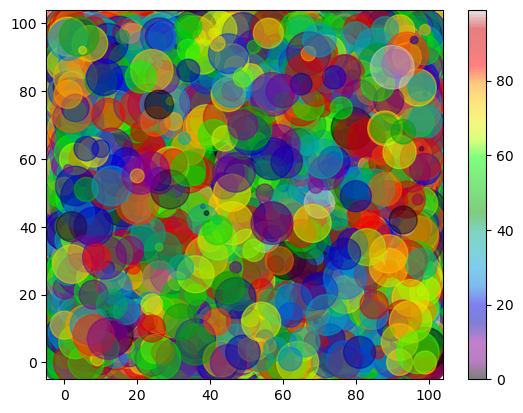

In [53]:
df.order = np.random.randint(100, size=(165474))
df.page = np.random.randint(100, size=(165474))
colors = np.random.randint(100, size=(165474))
sizes = 10 * np.random.randint(100, size=(165474))

plt.scatter(df.order, df.page, c=colors, s=sizes, alpha=0.5, cmap='nipy_spectral')

plt.colorbar()

plt.show()

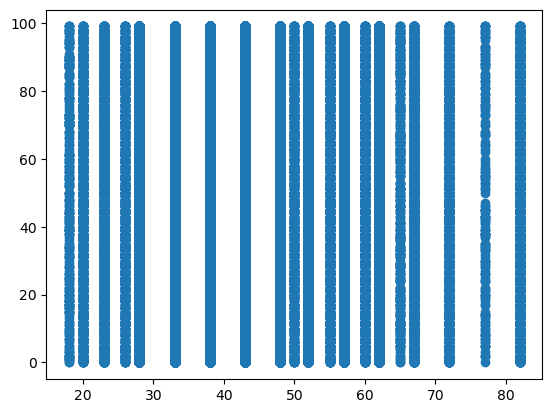

In [54]:
plt.scatter(df.price, df.page)
plt.show()

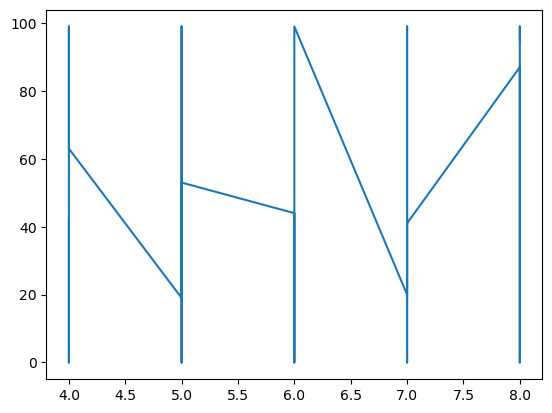

In [55]:
plt.plot(df.month, df.page)
plt.show()

In [57]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf1=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf1.fit(X_train,y_train)

y_pred1=clf1.predict(X_test)

In [59]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.9999798561730757


In [60]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
metrics.confusion_matrix(y_test, y_pred1)

array([[28181,     0,     0,     0,     0],
       [    0, 12251,     0,     1,     0],
       [    0,     0,  5755,     0,     0],
       [    0,     0,     0,  2657,     0],
       [    0,     0,     0,     0,   798]], dtype=int64)

In [61]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     28181
           2       1.00      1.00      1.00     12252
           3       1.00      1.00      1.00      5755
           4       1.00      1.00      1.00      2657
           5       1.00      1.00      1.00       798

    accuracy                           1.00     49643
   macro avg       1.00      1.00      1.00     49643
weighted avg       1.00      1.00      1.00     49643



In [58]:
#Import XGBoost
import xgboost as xgb

model = xgb.XGBClassifier()
model.fit(X_train, y_train)

y_pred=model.predict(X_test)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4], got [1 2 3 4 5]